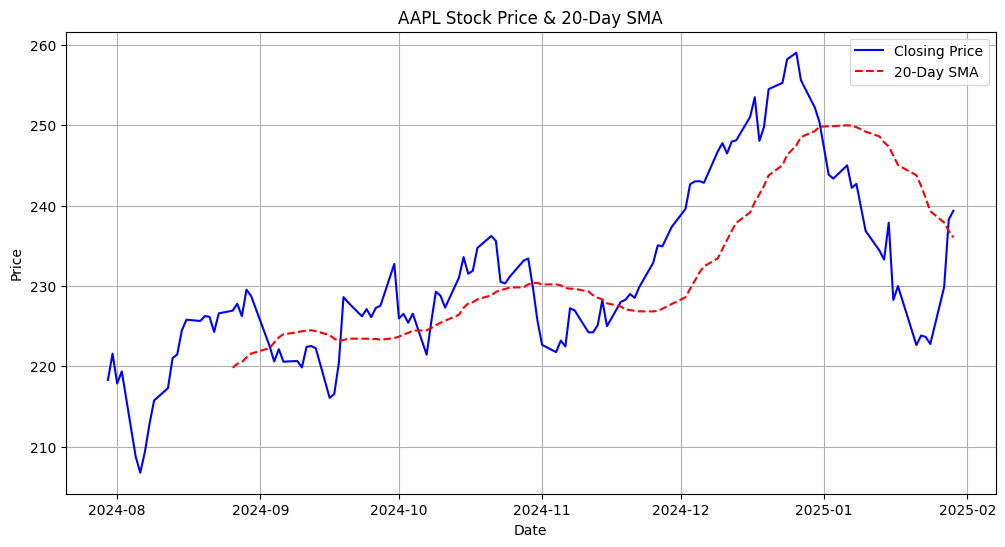

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, period="6mo", interval="1d"):
    """Fetch stock price data using Yahoo Finance."""
    stock = yf.Ticker(ticker)
    df = stock.history(period=period, interval=interval)
    return df

def calculate_sma(df, window=20):
    """Calculate Simple Moving Average (SMA)."""
    df[f'SMA_{window}'] = df['Close'].rolling(window=window).mean()
    return df

def plot_stock_sma(df, ticker, window=20):
    """Plot stock closing prices and SMA."""
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
    plt.plot(df.index, df[f'SMA_{window}'], label=f'{window}-Day SMA', color='red', linestyle='dashed')
    
    plt.title(f"{ticker} Stock Price & {window}-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage
ticker = "AAPL"  # Replace with any stock symbol
window_size = 20  # Adjust moving average window size

df = get_stock_data(ticker)
df = calculate_sma(df, window=window_size)
plot_stock_sma(df, ticker, window=window_size)


                                 Open        High         Low       Close  \
Date                                                                        
2025-01-23 00:00:00-05:00  224.740005  227.029999  222.300003  223.660004   
2025-01-24 00:00:00-05:00  224.779999  225.630005  221.410004  222.779999   
2025-01-27 00:00:00-05:00  224.020004  232.149994  223.979996  229.860001   
2025-01-28 00:00:00-05:00  230.850006  240.190002  230.809998  238.259995   
2025-01-29 00:00:00-05:00  234.149994  239.854996  234.009995  239.360001   

                             Volume  Dividends  Stock Splits         WMA  
Date                                                                      
2025-01-23 00:00:00-05:00  60234800        0.0           0.0  228.248726  
2025-01-24 00:00:00-05:00  54697900        0.0           0.0  226.691090  
2025-01-27 00:00:00-05:00  94863400        0.0           0.0  226.782908  
2025-01-28 00:00:00-05:00  75707600        0.0           0.0  228.529090  
2025-01-29

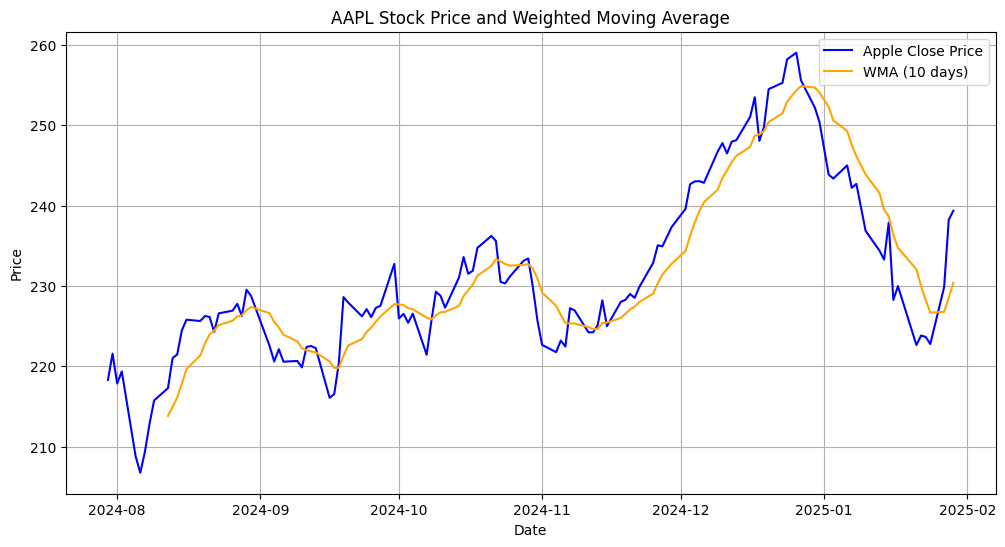

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Apple stock data
ticker = "AAPL"

def get_stock_data(ticker, period="6mo", interval="1d"):
    """Fetch stock price data using Yahoo Finance."""
    stock = yf.Ticker(ticker)
    df = stock.history(period=period, interval=interval)
    return df

data = get_stock_data(ticker)
# Define the window size
window_size = 10

# Calculate weights (e.g., linearly decreasing weights)
weights = np.arange(1, window_size + 1)  # [1, 2, 3, ..., 10]

# Function to calculate Weighted Moving Average
def weighted_moving_average(data, weights):
    return np.sum(data * weights) / np.sum(weights)

# Apply the WMA to the 'Close' price
data['WMA'] = data['Close'].rolling(window=window_size).apply(weighted_moving_average, args=(weights,))

# Display the last few rows of the data
print(data.tail())

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Apple Close Price', color='blue')
plt.plot(data['WMA'], label=f'WMA ({window_size} days)', color='orange')
plt.title(f'{ticker} Stock Price and Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()